# Training a DDPG agent

In [1]:
from unityagents import UnityEnvironment
import numpy as np

In [2]:
from IPython.display import clear_output

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
PATH = "C:/Users/Gebruiker/Documents/Coding 2019/deep-reinforcement-learning/p3_collab-compet/Tennis_Windows_x86_64/Tennis.exe"

In [5]:
env = UnityEnvironment(file_name=PATH)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [6]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [7]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


In [8]:
from agent import Agent

In [9]:
agent = Agent(state_size, action_size, num_agents)

In [10]:
epocs = 100 #number of episodes
completion_score = 1.1 #Training is stopped if this average score is reached
games_per_epoc = 20
game_max_length = 1000 #steps per episode or untill done
rewards     = []

In [11]:
for epoc in range(epocs):
    epoc_avg_reward = 0
    for game in range(games_per_epoc):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        for step in range(game_max_length):
            action = agent.get_action(state)
            action = np.clip(action, -1, 1)  
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations
            reward = env_info.rewards
            dones = env_info.local_done

            agent.add_replay(state, action, reward, next_state, dones)

            agent.learning_step()

            state = next_state
            scores += env_info.rewards                         # update the score (for each agent)
            #epoc_avg_reward += sum(reward)/float(games_per_epoc)

            if np.any(dones):                                  # exit loop if episode finished
                break
        epoc_avg_reward += np.max(scores)/float(games_per_epoc)

    print ("epoc: {0:3} reward: {1:2.5f}".format(epoc,epoc_avg_reward))
    rewards.append(epoc_avg_reward)
    if (epoc_avg_reward > completion_score):
        break

C:\Users\Gebruiker\Anaconda3\envs\drlnd\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


epoc:   0 reward: 0.00000
epoc:   1 reward: 0.00450
epoc:   2 reward: 0.00000
epoc:   3 reward: 0.00000
epoc:   4 reward: 0.00000
epoc:   5 reward: 0.00000
epoc:   6 reward: 0.01450
epoc:   7 reward: 0.00000
epoc:   8 reward: 0.00000
epoc:   9 reward: 0.00000
epoc:  10 reward: 0.00000
epoc:  11 reward: 0.02950
epoc:  12 reward: 0.00500
epoc:  13 reward: 0.00500
epoc:  14 reward: 0.00000
epoc:  15 reward: 0.00500
epoc:  16 reward: 0.05500
epoc:  17 reward: 0.03950
epoc:  18 reward: 0.04350
epoc:  19 reward: 0.07650
epoc:  20 reward: 0.06200
epoc:  21 reward: 0.04800
epoc:  22 reward: 0.04300
epoc:  23 reward: 0.02900
epoc:  24 reward: 0.06800
epoc:  25 reward: 0.13400
epoc:  26 reward: 0.11500
epoc:  27 reward: 0.11500
epoc:  28 reward: 0.07950
epoc:  29 reward: 0.01500
epoc:  30 reward: 0.05000
epoc:  31 reward: 0.08450
epoc:  32 reward: 0.08900
epoc:  33 reward: 0.16450
epoc:  34 reward: 0.13450
epoc:  35 reward: 0.09500
epoc:  36 reward: 0.12000
epoc:  37 reward: 0.17450
epoc:  38 re

In [12]:
agent.save("model1")

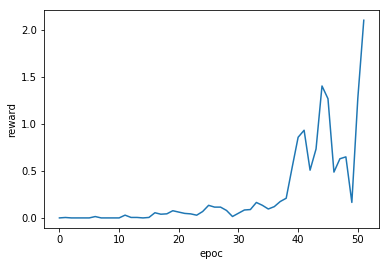

In [13]:
plt.plot(rewards)
plt.ylabel('reward')
plt.xlabel('epoc')
plt.show()

In [14]:
env.close()